In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import glob
from keras.applications.vgg19 import VGG19
from keras.models import Sequential, Model
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(os.listdir('images/'))

['masks', 'test_data', 'train_data']


In [3]:
H = 512
W = 512
train_images = []
train_masks = []

# Load train Images & Convert to array

In [4]:
for directory_path in glob.glob('images/train_data'):
    for img_path in glob.glob(os.path.join(directory_path,'*.png')):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (H,W))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        train_images.append(img)

train_images = np.array(train_images)

# Load Masks & Convert to array

In [5]:
for directory_path in glob.glob('images/masks'):
    for mask_path in glob.glob(os.path.join(directory_path, '*.png')):
        mask = cv2.imread(mask_path, 0) # read masks as grayscale
        mask = cv2.resize(mask, (H,W))
        train_masks.append(mask)
train_masks = np.array(train_masks)

Assign Variables

In [6]:
X_train = train_images
Y_train = train_masks

# Load VGG Model

In [7]:
vgg_model = VGG19(include_top=False, weights="imagenet", input_shape=(H, W, 3))
for layer in vgg_model.layers:
    layer.trainable = False

In [8]:
vgg_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 512, 512, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 512, 512, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 256, 256, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 256, 256, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 128, 128, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 128, 128, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 128, 128, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 128, 128, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 64, 64, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 64, 64, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 64, 64, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 64, 64, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 32, 32, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [9]:
new_model = Model(inputs = vgg_model.inputs, outputs = vgg_model.get_layer('block1_conv2').output)
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 512, 512, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 512, 512, 64)        │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,720 (151.25 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 38,720 (151.25 KB)

In [10]:
features = new_model.predict(X_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [11]:
features.shape

(10, 512, 512, 64)

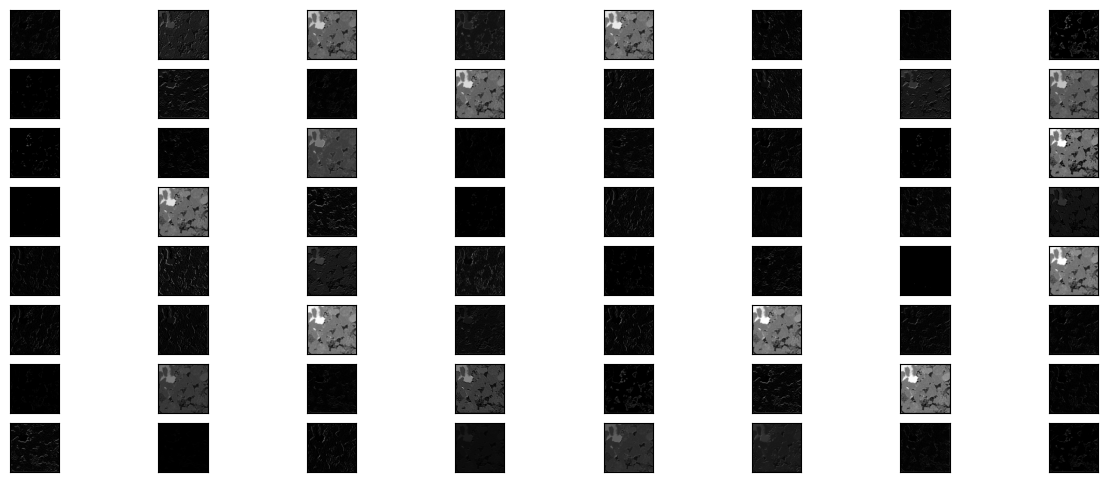

In [12]:
square = 8 # Rows & Columns
i=1
fig = plt.figure(figsize=(15, 6)) 
for _ in range(square):
    for _ in range(square):
        ax = plt.subplot(square, square, i) # 8x8 network 
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(features[0,:,:,i-1], cmap='gray')
        i+=1
plt.show()

# Reshape X, Y

In [13]:
X = features
X = X.reshape(-1, X.shape[3])

In [14]:
X.shape

(2621440, 64)

In [15]:
Y = Y_train.reshape(-1)

In [16]:
Y.shape

(2621440,)

# Combine X and Y into a dataframe  

In [17]:
#Combine X and Y into a dataframe to make it easy to drop all rows with Y values 0
#In our labels Y values 0 = unlabeled pixels. 
dataset = pd.DataFrame(X)
dataset['label'] = Y

In [18]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,790.081299,132.965866,0.000000,136.120758,321.691010,0.000000,0.0,34.652016,234.665436,0.0,...,36.805275,0.0,699.043213,0.0,0.0,26.888969,79.620461,636.807495,171.646866,2
1,132.864700,200.872543,104.707443,184.088989,705.246582,0.000000,0.0,4.067509,283.972778,0.0,...,0.000000,0.0,1047.401855,0.0,0.0,121.601494,157.510803,214.325653,40.423737,2
2,173.124771,195.834335,75.020607,182.737808,690.680664,232.147583,0.0,13.614291,188.682297,0.0,...,0.000000,0.0,1135.283081,0.0,0.0,65.365761,148.604843,108.333069,0.000000,2
3,139.230164,185.958893,76.432602,182.835510,702.320618,251.303406,0.0,13.433936,192.318741,0.0,...,0.000000,0.0,1150.180176,0.0,0.0,68.789001,148.298431,97.211823,0.000000,2
4,121.306313,173.940369,74.847954,181.433456,702.230103,267.009857,0.0,14.714460,191.384735,0.0,...,0.000000,0.0,1149.396851,0.0,0.0,69.229263,145.807175,82.837257,0.000000,2


In [19]:
print(dataset['label'].unique())
print(dataset['label'].value_counts())

[2 3 1 0]
label
2    2072206
0     273488
1     212175
3      63571
Name: count, dtype: int64


In [20]:
dataset = dataset[dataset['label'] != 0]

In [21]:
print(dataset['label'].unique())
print(dataset['label'].value_counts())

[2 3 1]
label
2    2072206
1     212175
3      63571
Name: count, dtype: int64


In [22]:
X_RF = dataset.drop(labels=['label'], axis = 1)
Y_RF = dataset['label']

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 20, random_state=44)

In [26]:
model.fit(X_RF, Y_RF)

RandomForestClassifier(n_estimators=20, random_state=44)

# Load Test Image

In [27]:
test_img = cv2.imread('images/test_data/img_107.png', cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (H,W))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis= 0)

In [28]:
test_img.shape

(1, 512, 512, 3)

In [29]:
test_feature = new_model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


In [30]:
test_feature.shape

(1, 512, 512, 64)

In [32]:
test_feature = test_feature.reshape(-1, test_feature.shape[3])
test_feature.shape

(262144, 64)

In [35]:
prediction = model.predict(test_feature)

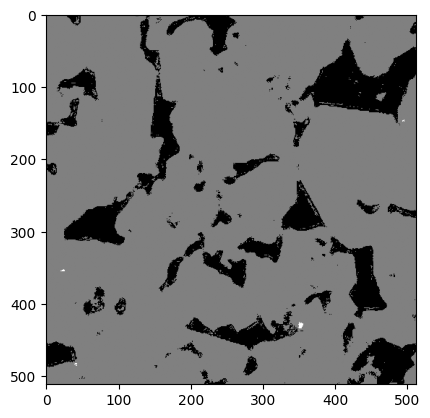

In [37]:
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')